In [3]:
from tsai.basics import *
import sktime
import sklearn
import numpy as np
my_setup(sktime, sklearn)

os             : Windows-10-10.0.16299-SP0
python         : 3.8.8
tsai           : 0.3.1
fastai         : 2.6.3
fastcore       : 1.4.3
sktime         : 0.11.4
sklearn        : 1.1.0
torch          : 1.10.0+cpu
device         : cpu
cpu cores      : 8
RAM            : 15.82 GB
GPU memory     : N/A


In [4]:
from sklearn.metrics import mean_squared_error, make_scorer
data = 'ECG200'
X_train, y_train, X_vaild, y_vaild = get_UCR_data(data)

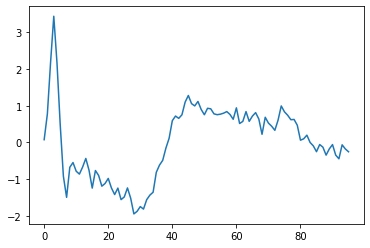

In [111]:
import matplotlib.pyplot as plt
plt.plot(X_train[99,0])

TSF,时间序列森林

In [7]:
from sktime.classification.interval_based import TimeSeriesForestClassifier
from sklearn.metrics import accuracy_score
cla_TSF = TimeSeriesForestClassifier()
t = timer.start(False)
cla_TSF.fit(X_train,y_train)
t = timer.stop()
y_pred = cla_TSF.predict(X_vaild)
accuracy = accuracy_score(y_vaild, y_pred)
print(f'accuracy:{accuracy} time:{t}')

accuracy:0.88 time:0:00:00.528915


RISE

In [113]:
from sktime.classification.interval_based import RandomIntervalSpectralEnsemble
cla_RISE = RandomIntervalSpectralEnsemble()
t = timer.start(False)
cla_RISE.fit(X_train,y_train)
t = timer.stop()
y_pred = cla_RISE.predict(X_vaild)
accuracy = accuracy_score(y_vaild, y_pred)
print(f'accuracy:{accuracy} time:{t}')

accuracy:0.88 time:0:00:08.265405


BOSSEnsemble

In [114]:
from sktime.classification.dictionary_based import BOSSEnsemble
cla_bossEn = BOSSEnsemble()
t = timer.start(False)
cla_bossEn.fit(X_train,y_train)
t = timer.stop()
y_pred = cla_bossEn.predict(X_vaild)
accuracy = accuracy_score(y_vaild, y_pred)
print(f'accuracy:{accuracy} time:{t}')

accuracy:0.88 time:0:00:22.099747


cBOSS

In [115]:
from sktime.classification.dictionary_based import ContractableBOSS
cla_cboss = ContractableBOSS()
t = timer.start(False)
cla_cboss.fit(X_train,y_train)
t = timer.stop()
y_pred = cla_cboss.predict(X_vaild)
accuracy = accuracy_score(y_vaild, y_pred)
print(f'accuracy:{accuracy} time:{t}')

accuracy:0.85 time:0:00:16.449514


Shapelet Transform ,ST

In [116]:
from sktime.classification.shapelet_based import ShapeletTransformClassifier

X_train = X_train.astype(np.float64)#要求输入格式为float64
cla_ST = ShapeletTransformClassifier()
t = timer.start(False)
cla_ST.fit(X_train,y_train)
t = timer.stop()
y_pred = cla_ST.predict(X_vaild)
accuracy = accuracy_score(y_vaild, y_pred)
print(f'accuracy:{accuracy} time:{t}')

accuracy:0.86 time:0:00:13.729975


Learned shapelets,LS

In [117]:
X_train = X_train.reshape(100,96)
X_vaild = X_vaild.reshape(100,96)

In [118]:
from pyts.classification import LearningShapelets
cla_LS = LearningShapelets(random_state=42,tol=0.01)
t = timer.start(False)
cla_LS.fit(X_train,y_train)
t = timer.stop()
y_pred = cla_LS.predict(X_vaild)
accuracy = accuracy_score(y_vaild, y_pred)
print(f'accuracy:{accuracy} time:{t}')

accuracy:0.7 time:0:00:08.208589


MiniRocket

In [8]:
X_train = X_train.reshape(100,1,96)
X_vaild = X_vaild.reshape(100,1,96)
from tsai.all import *
cla_MR = MiniRocketClassifier()
t = timer.start(False)
cla_MR.fit(X_train,y_train)
t = timer.stop()
y_pred = cla_MR.predict(X_vaild)
accuracy = accuracy_score(y_vaild, y_pred)
print(f'accuracy:{accuracy} time:{t}')

accuracy:0.92 time:0:00:00.298910


LSTM

In [9]:
bs = 16
X, y, splits = get_UCR_data(data, return_split=False)
tfms  = [None, [TSCategorize()]]
dsets = TSDatasets(X, y, tfms=tfms, splits=splits)
dls   = TSDataLoaders.from_dsets(dsets.train, dsets.valid, bs=bs, num_workers=0, shuffle=False)
model = LSTM(dls.vars, dls.c)
t = timer.start(False)
learn = Learner(dls, model)
learn.fit(10, 0.003)
t = timer.stop()
y_pred = cla_MR.predict(X_vaild)
accuracy = accuracy_score(y_vaild, y_pred)
print(f'accuracy:{accuracy} time:{t}')

epoch,train_loss,valid_loss,time
0,0.677981,0.644396,00:01
1,0.624564,0.637857,00:00
2,0.589087,0.636913,00:00
3,0.568415,0.602035,00:00
4,0.554881,0.602642,00:00
5,0.536544,0.669361,00:00
6,0.522525,0.618113,00:00
7,0.511183,0.625060,00:00
8,0.501544,0.639745,00:00
9,0.493211,0.621597,00:00


accuracy:0.92 time:0:00:04.460980


FCN

In [121]:
model2 = FCN(dls.vars, dls.c)
t = timer.start(False)
learn = Learner(dls, model2)
learn.fit(10, 0.003)
t = timer.stop()
y_pred = cla_MR.predict(X_vaild)
accuracy = accuracy_score(y_vaild, y_pred)
print(f'accuracy:{accuracy} time:{t}')

epoch,train_loss,valid_loss,time
0,0.547296,1.772267,00:00
1,0.499763,0.730462,00:00
2,0.462387,0.664671,00:00
3,0.431012,0.471417,00:00
4,0.400731,0.383626,00:00
5,0.375248,0.423271,00:00
6,0.352649,0.407306,00:00
7,0.337707,0.696336,00:00
8,0.320413,0.359172,00:00
9,0.302707,0.718250,00:00


accuracy:0.92 time:0:00:03.209944


In [13]:
splits


((#100) [0,1,2,3,4,5,6,7,8,9...],
 (#100) [100,101,102,103,104,105,106,107,108,109...])